Instructions:
1. Choose a unique dataset from: https://archive.ics.uci.edu
2. Your dataset should be unique from your classmates otherwise no points will be given for this exercise.
### Complete the Tasks in bold

## Data Exploration

**TASK: Create a correlation heatmap.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('BitcoinHeistData.csv')
print(data.columns)

Index(['address', 'year', 'day', 'length', 'weight', 'count', 'looped',
       'neighbors', 'income', 'label'],
      dtype='object')


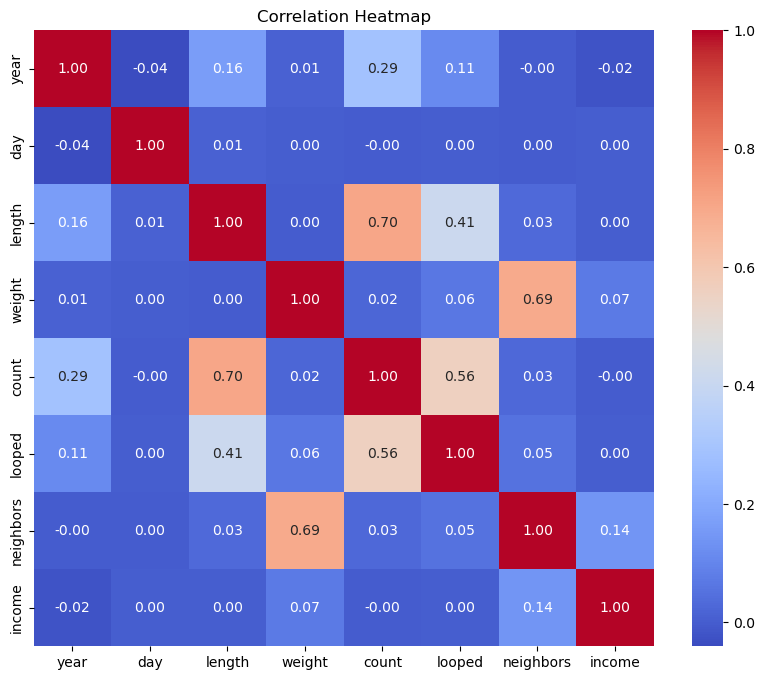

In [2]:
# Drop non-numeric columns if any
numeric_data = data.drop(['address', 'label'], axis=1)

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

The target label on the heap is "income". Based on the absolute correlation values, the top 5 most correlated features with "income" are the following: weight, count, looped, length, and neighbors

## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: Do not forget to put a random_state for reproducibility.*

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Split the data into features and labels
X = data.drop(columns=['label', 'address'])  # Features
y = data['label']  # Labels

# Split the data into training set (90%) and test set (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [4]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [ ]:
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],  # various values of k
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=9)  # Using 9-fold cross-validation
grid_search.fit(X_train, y_train)

# Report the best performing parameters
print("Best parameters:", grid_search.best_params_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(


**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

In [ ]:
# Extract mean test scores and corresponding k values
mean_test_scores = grid_search.cv_results_['mean_test_score']
k_values = param_grid['knn__n_neighbors']

# Plot mean test scores vs. k values
plt.plot(k_values, mean_test_scores, marker='o')
plt.title('Mean Test Scores vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Test Score')
plt.grid(True)
plt.show()

### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred = grid_search.predict(X_test)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)